# Project Overview
Here includes the following steps to do analyses for **How to make your place help you earn extra money!**

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Model Building
5. Evaluation of results

## Business Understanding
Before being a host, we may have the following questions:

1. Is your location suitable to host on Airbnb?
2. What type of property you can earn from it?
3. What other factors may help you make a decision on the price of your place?


## Data Understanding
If the data from living.csv is broken, please download the data in Taipei section from **Inside Airbnb**. <br>
Let's first look into the data to pick up columns of interest might help us anwser the questions in the first section.

In [234]:
## Import all libraries we use for this project
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather and access to the data from Inside Airbnb's Taipei section
df = pd.read_csv('./listings.csv')

## To see all columns in the data
pd.set_option('display.max_columns', None) 
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,74641,https://www.airbnb.com/rooms/74641,20201030035535,2020-10-30,黑白雙人房@南京復興站。小巨蛋斜對面。溫泉式浴缸。,"私人衛浴大套房,距南京復興站走路2分鐘。面對7-11便利商店,旁邊就是南京微風百貨和IKEA...",This area is what we called Business & Residen...,https://a0.muscache.com/pictures/10787933/fa20...,393116,https://www.airbnb.com/users/show/393116,Yi-Wan,2011-02-15,Taipei,I carve small wooden objects by hand tools & s...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/393116/profil...,https://a0.muscache.com/im/users/393116/profil...,Songshan,4,4,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Songshan District, Taipei, Taiwan",松山區,NaN,25.05159,121.54747,Private room in guest suite,Private room,3,NaN,1 private bath,1.0,1.0,"[""Iron"", ""Paid parking off premises"", ""TV"", ""S...","$1,429.00",3,28,3,3,28,28,3.0,28.0,NaN,t,28,58,88,88,2020-10-30,49,1,0,2011-11-20,2020-01-02,88.0,9.0,9.0,9.0,10.0,9.0,9.0,NaN,f,4,0,4,0,0.45
1,74643,https://www.airbnb.com/rooms/74643,20201030035535,2020-10-30,小巨蛋。南京復興站溫馨套房,"小巨蛋對面，距南京復興站走路2分鐘。面對7-11便利商店,旁邊就是南京微風百貨；私人衛浴套房...",微風南京，台北小巨蛋。<br />南京復興捷運站，兄弟飯店，文華飯店。,https://a0.muscache.com/pictures/10794157/4b52...,393116,https://www.airbnb.com/users/show/393116,Yi-Wan,2011-02-15,Taipei,I carve small wooden objects by hand tools & s...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/393116/profil...,https://a0.muscache.com/im/users/393116/profil...,Songshan,4,4,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Songshan District, Taiwan",中山區,NaN,25.04939,121.54352,Private room in guest suite,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Long term stays allowed"", ""Hangers"", ""Heatin...","$1,429.00",3,365,3,3,365,365,3.0,365.0,NaN,t,30,60,86,86,2020-10-30,52,1,0,2011-04-05,2019-12-31,94.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,f,4,0,4,0,0.45
2,178036,https://www.airbnb.com/rooms/178036,20201030035535,2020-10-30,單人床位 Single bunk bed [mixed dorm for 4pax],Hello from Taipei :)<br />We are located at Z...,Local food within 5 mins walk<br />6 mins walk...,https://a0.muscache.com/pictures/1263b356-1513...,851825,https://www.airbnb.com/users/show/851825,TaipeiTaipei Hostel,2011-07-21,"Da’an District, Taipei City, Taiwan",Hello :D\nThis is Taipei Taipei Team!\nWe are ...,within an hour,100%,95%,f,https://a0.muscache.com/im/pictures/user/c9e25...,https://a0.muscache.com/im/pictures/user/c9e25...,Zhongzheng,9,9,"['email', 'phone', 'facebook', 'reviews']",t,t,"Zhongzheng District, Taipei, Taiwan",中正區,NaN,25.04446,121.51346,Room in hostel,Hotel room,1,NaN,4 baths,1.0,4.0,"[""Room-darkening shades"", ""Breakfast"", ""Shampo...",$597.00,1,90,1,2,90,90,1.3,90.0,NaN,t,29,59,84,359,2020-10-30,80,9,0,2011-07-30,2020-09-14,92.0,9.0,9.0,10.0,10.0,10.0,10.0,NaN,t,8,0,1,1,0.71
3,2717

## Q1. Is your location suitable to host on Airbnb?

**neighbourhood_cleansed** is related to locations so let's check it out!

In [235]:
## data description
df['neighbourhood_cleansed'].describe()

count     5431
unique      12
top        萬華區
freq      1106
Name: neighbourhood_cleansed, dtype: object

In [236]:
## value missing
df['neighbourhood_cleansed'].isnull().sum()

0



### Clean the data
Since there is no value missing, we only need to deal with the name for each content.<br>
Replace Mandarin with English allowing more people to understand our analysis.

In [237]:
## There are 12 districts in Taipei
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('中正區', 'Zhongzheng')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('大同區', 'Datong')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('中山區', 'Zhongshan')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('松山區', 'Songshan')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('大安區', "Da'an")
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('萬華區', 'Wanhua')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('信義區', 'Xinyi')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('士林區', 'Shilin')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('北投區', 'Beitou')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('內湖區', 'Neihu')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('南港區', 'Nangang')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('文山區', 'Wenshan')
df.shape

(5431, 74)

[Text(0, 0.5, 'Number of hosts'), Text(0.5, 0, 'Location')]

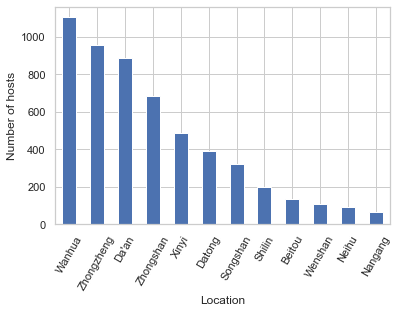

In [238]:
## Plot the result
location_with_counts = df['neighbourhood_cleansed'].value_counts()
location_with_counts_plot = location_with_counts.plot(kind='bar', rot=60)
location_with_counts_plot.set(xlabel="Location", ylabel="Number of hosts")

### **Interpretation**
1. From the figure above, Wanhua is the region that most people host on Airbnb.
2. Wenshan, Neihu, and Nangang are much lower than other districts.

Check out the average price of each district as well.<br>
So, we need to put anotehr factor, **price**, into discusstion.

In [239]:
df['price'].describe()

count          5431
unique         1768
top       $1,200.00
freq             86
Name: price, dtype: object

In [240]:
df['price'].isnull().sum()

0

### Clean the data
Convert the object type of price to int to calculate the mean of it.

In [241]:
## Before converting, some of characters need to be removed.
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)
df['price'] = df['price'].astype('int')

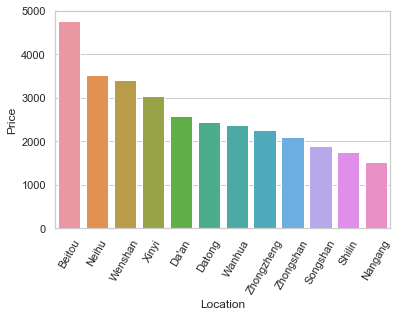

In [242]:
## Plot the result
location_with_price = pd.DataFrame(
    df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
).reset_index()

sns.set(style="whitegrid")
sns.barplot(x = 'neighbourhood_cleansed',
            y = 'price',
            data = location_with_price)

plt.xticks(rotation=60)
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

### **Interpretation**
1. Beitou is the most expensive district for people to stay with almost NT5000.
2. The cost of Neihu, Wenshan, and Xinyi is between NT3000 and NT4000.
3. The rest of places are lower than NT3000.

## Q2. What type of property you can earn from it?
The type of property is one of the main factors to affect the price of a place. However, Taipei is a small city so most places hosting on Airbnb are kinds of rooms so we prefer to use **room_type** instead of **property_type** for further analysis.

In [243]:
df['room_type'].describe()

count                5431
unique                  4
top       Entire home/apt
freq                 2656
Name: room_type, dtype: object

In [244]:
df['room_type'].isnull().sum()

0

Compare room types with the average price

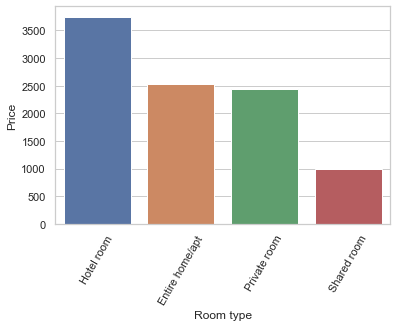

In [245]:
## Plot the result
room_type_with_price = pd.DataFrame(
    df.groupby('room_type')['price'].mean().sort_values(ascending=False)
).reset_index()

sns.barplot(x = 'room_type',
            y = 'price',
            data = room_type_with_price)
plt.xticks(rotation=60)
plt.xlabel('Room type')
plt.ylabel('Price')
plt.show()

### **Interpretation**
1. The type of the hotel room is the highest average price compared to others.
2. On the other hand, the type of the shared room is the lowest.
3. The type of the entire home/apartment and the private room share the similar price of NT2500. 

Also, what types of rooms distribute to each of the districts.

Text(0, 0.5, 'Number of rooms')

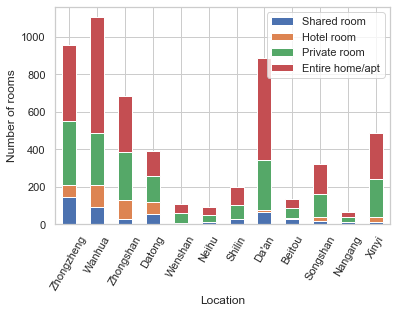

In [246]:
## Plot the result
room_type_counts = df.groupby('neighbourhood_cleansed')['room_type'].value_counts()

## some of districts don't have some room types, so we have to fill it with zero
sorted_data = []
listed_location = list(set(df['neighbourhood_cleansed']))
listed_room_type = list(set(df['room_type']))

for location in listed_location:
    types = []
    for room_type in listed_room_type:
        try:
            types.append(room_type_counts[location][room_type])
        except:
            types.append(0)
    sorted_data.append(types)

location_room_types = pd.DataFrame(data=sorted_data, index=listed_location, columns=listed_room_type)
location_room_types.plot.bar(stacked=True, rot=60)
plt.xlabel('Location')
plt.ylabel('Number of rooms')

### **Interpretation**
1. The entire home/apt and the private room are the type that most people host in each district.

## Q3. What other factors may help you make a decision on the price of your place?
We expect the following factors in the data below may influence the price the most.<br>

**neighbourhood_cleansed<br>
host_listings_count<br>
room_type<br>
accommodates<br>
bathrooms_text<br>
bedrooms<br>
beds<br>
amenities<br>
price**<br>

In [247]:
#Therefore, we only put the columns we choose into our df,
picked_df = df[['beds', 'bedrooms', 'bathrooms_text',
                'host_listings_count', 'accommodates',
                'amenities', 'neighbourhood_cleansed',
                'room_type', 'price']]

In [248]:
## check data types of our interests
picked_df.dtypes

beds                      float64
bedrooms                  float64
bathrooms_text             object
host_listings_count         int64
accommodates                int64
amenities                  object
neighbourhood_cleansed     object
room_type                  object
price                       int64
dtype: object

In [249]:
## check values missing
picked_df.isnull().sum()

beds                       53
bedrooms                  405
bathrooms_text              7
host_listings_count         0
accommodates                0
amenities                   0
neighbourhood_cleansed      0
room_type                   0
price                       0
dtype: int64

## Data Preparation


Let's clean **bathrooms_text** first.<br>
Convert it from string to float to count how many bath rooms of each place.

In [250]:
## Only take numerical values out, so they can be converted to float later.
for i, text in enumerate(picked_df['bathrooms_text']):
    try:
        text = text.split(' ')[0]
        if text == 'Shared' or text == 'Half-bath':
            picked_df['bathrooms_text'][i] = 0.5
        else:
            picked_df['bathrooms_text'][i] = float(text)
    except:
        picked_df['bathrooms_text'][i] = 1.0

## Convert data type
picked_df['bathrooms'] = picked_df['bathrooms_text'].astype('float')

## Drop the original column
picked_df.drop(['bathrooms_text'], axis=1, inplace=True)

/Users/chunfan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/chunfan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/chunfan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  #

Also, clean another column with object data type, **amenities**.<br>
List every single amenity from the data, so we will know which one may affect price the most as well.<br>
Make each of them have a specific column for modeling.

In [251]:
## Get rid of any characters to help make a list later.
picked_df['amenities'] = picked_df['amenities'].replace('["]', '', regex=True)

listed_amenities = []
unique_amenities = set()
for amenities in picked_df['amenities']:
    amenities = amenities[1:-1].split(',')
    temp = []
    for amenity in amenities:
        amenity = amenity.strip(' ')
        if amenity == '':
            continue
        temp.append(amenity)
        unique_amenities.add(amenity)
    listed_amenities.append(temp)

## Create each column for individual amenities.
picked_df['amenities'] = listed_amenities
for amenity in unique_amenities:
    picked_df[amenity] = picked_df['amenities'].apply(lambda x: 1 if amenity in x else 0)

##　To count how many amenities in each row.
picked_df['num_amenities'] = picked_df['amenities'].apply(lambda x: len(x))

## We don't need the original column of amenities any more.
picked_df.drop(['amenities'], axis=1, inplace=True)

/Users/chunfan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/chunfan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/chunfan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

### Fill NaN
Fill nan in the columns with the mean for numerical variables and dummies for objects.

In [252]:
def fill_nan_with_mean(df, col_name):
    '''
    INPUT:
    df - the dataframe you want to fill with
    col_name - the name of the column you're gonna average
    
    OUTPUT
    df = the dataframe replaced nan with the mean of specific column
    '''

    mean_col = df[col_name].mean()
    df[col_name] = df[col_name].fillna(mean_col)
    
    return df

In [253]:
## beds and bedrooms are only columns with nan
## So, we gonna fill them with mean

picked_df = fill_nan_with_mean(picked_df, 'beds')
picked_df = fill_nan_with_mean(picked_df, 'bedrooms')

### Dummy
Encode all categorical columns with 0 or 1

In [254]:
def dummy(df, col_name):
    '''
    INPUT:
    df - the dataframe with categorical columns
    col_name - the name of column you're gonna dummy
    
    OUTPUT
    new_df - new dataframe with dummies
    '''
    dummies = pd.get_dummies(df[col_name])
    df.drop([col_name], axis=1, inplace=True)
    
    new_df = pd.concat([df, dummies], axis=1, sort=False)
    return new_df  

In [255]:
## neighbourhood_cleansed and room_type are only columns haven't been dummied yet
picked_df = dummy(picked_df, 'neighbourhood_cleansed')
picked_df = dummy(picked_df, 'room_type')

### Normalization
In order to make a model having a better result, we need to normalize the data.

In [256]:
## Convert numerical data from int to float to make sure each of them can be normalized later
## Hint: Do not normalize catogories.

picked_df['host_listings_count'] = picked_df['host_listings_count'].astype('float')
picked_df['accommodates'] = picked_df['accommodates'].astype('float')
picked_df['price'] = picked_df['price'].astype('float')

num_vars = picked_df.select_dtypes(include=['float']).columns
names = num_vars
scaled_df = pd.DataFrame(preprocessing.normalize(picked_df[num_vars]), columns=names)
picked_df.drop(num_vars, axis = 1, inplace=True)

picked_df = pd.concat([picked_df, scaled_df], axis=1, sort=False)

Before training, double check the picked data that is what we expected.


In [257]:
picked_df

,Fire extinguisher,Children\u2019s dinnerware,Ethernet connection,Bluetooth sound system,Body soap,Garden or backyard,Paid parking garage on premises,Dishes and silverware,premium cable,Fireplace guards,Stove,Pool,Wifi \u2013 100 Mbps,Smoke alarm,Paid parking garage on premises \u2013 8 spaces,Long term stays allowed,Nespresso machine,Baby monitor,Yinghua induction stove,Freezer,Dishwasher,HDTV with premium cable,Room-darkening shades,Window guards,Children\u2019s books and toys,BBQ grill,Dryer \u2013\u00a0In unit,Cable TV,Building staff,Breakfast,Oven,HDTV with standard cable,Piano,Wifi \u2013 80 Mbps,YAMAHA sound system with aux,Lock on bedroom door,Elevator,Waterfront,Pack \u2019n Play/travel crib,Cleaning before checkout,Extra pillows and blankets,Luggage dropoff allowed,Paid parking on premises,Bread maker,50\ HDTV with standard cable,Washer,Crib,Bathtub,standard cable,Essentials,Ceiling fan,44\ HDTV with standard cable,Dryer,Free driveway parking on premises \u2013 1 space,Laptop-friendly workspace,cherry gas stove,High chair,Free parking on premises,Portable fans,Wifi,36\ HDTV with standard cable,Coffee maker,Keypad,Iron,Barbecue utensils,23\ HDTV with Chromecast,Host greets you,Conditioner,Hair dryer,Paid parking off premises,Johnson's \u5b0c\u751f shampoo,Stair gates,Carbon monoxide alarm,Patio or balcony,TV,Table corner guards,Free street parking,Outlet covers,Mini fridge,Smart lock,Kitchen,Baby bath,Baking sheet,House shampoo,Pour Over Coffee,Lockbox,Shampoo,Beachfront,Teco refrigerator,Paid street parking off premises,Indoor fireplace,EV charger,Dryer \u2013 In building,HDTV with Netflix,Shower gel,First aid kit,Pocket wifi,Private entrance,Game console,Chromecast,Bed linens,Changing table,Washer \u2013\u00a0In building,Hot tub,house shampoo,Paid parking lot off premises,Private living room,Hot water,HITACHI refrigerator,42\ HDTV with premium cable,Refrigerator,Washer \u2013\u00a0In unit,Trash compactor,Hangers,Rice Maker,Lake access,Central air conditioning,Paid parking garage on premises \u2013 1 space,32\ HDTV with premium cable,Wifi \u2013 40 Mbps,Laundromat nearby,Babysitter recommendations,BOSE sound system,Paid parking garage off premises,Sound system,Heating,Gym,Window AC unit,Beach essentials,Single level home,Microwave,Electric stove,Induction stove,Air conditioning,Cooking basics,num_amenities,Beitou,Da'an,Datong,Nangang,Neihu,Shilin,Songshan,Wanhua,Wenshan,Xinyi,Zhongshan,Zhongzheng,Entire home/apt,Hotel room,Private room,Shared room,beds,bedrooms,host_listings_count,accommodates,price,bathrooms
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.000700,0.000700,0.002799,0.002099,0.999993,0.000700
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.000700,0.000700,0.002799,0.001400,0.999994,0.001050
2,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,23,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.006699,0.001675,0.015073,0.001675,0.999839,0.006699
3,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,30,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.001667,0.001667,0.000000,0.001667,0.999995,

## Model Building


In [258]:
## Make price as target and the rest of elements as the training data to build a model.
X = picked_df.drop(['price'], axis=1)
y = picked_df['price']

## Split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

## Linear Regression method
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

## Prediction
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test)

## Evaluation
print("r2 score on train set: {}".format(r2_score(y_train, y_train_preds)))
print("r2 score on test set: {}".format(r2_score(y_test, y_test_preds)))

r2 score on train set: 0.8319270803449114
r2 score on test set: 0.842376264952547


### Feature Importance
Let's see what features influence the price the most.

In [259]:
## Examine coefficients of the trained model
coefs_df = pd.DataFrame()

coefs_df['factors'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df.sort_values('abs_coefs', ascending=False).head(5)

,factors,coefs,abs_coefs
153,bedrooms,0.257535,0.257535
154,host_listings_count,-0.060182,0.060182
156,bathrooms,0.021371,0.021371
155,accommodates,-0.021150,0.021150
152,beds,-0.017114,0.017114


### **Interpretation**
1. The top 5 features look like have the same property related to the number of spaces allowing people to stay.

In [260]:
## Let's only look at the positive part. 

coefs_df.sort_values('coefs', ascending=False).head(5)

,factors,coefs,abs_coefs
153,bedrooms,0.257535,0.257535
156,bathrooms,0.021371,0.021371
6,Paid parking garage on premises,0.000528,0.000528
65,23\ HDTV with Chromecast,0.000500,0.000500
111,Washer \u2013\u00a0In unit,0.000499,0.000499


### **Interpretation**
1. Amenities show up!
2. The top 1 of amenities is paid parking garage on premises. 

## Evaluation of Results

**1. Is your location suitable to host on Airbnb?**<br>
Wanhua is the best ditrict to host on Airbnb.

**2. What type of property you can earn from it?**<br>
An entire apartment or a private room is the type that most people host on Airbnb and you can make around NT2500 from it.

**3. What other factors may help you make a decision on the price of your place?**<br>
An apartment divided to a couple of private rooms with its own bathrooms is the best options for Airbnb in Taipei. Plus, if you had space for people to park their cars, you can make the price a little bit higher!
